<a href="https://colab.research.google.com/github/693080593/research/blob/master/Bike_Sharing_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 读取数据
import pandas as pd
df = pd.read_csv(r'/content/train.csv')
pd.set_option('display.max_rows',4 )
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011/1/1 0:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011/1/1 1:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
...,...,...,...,...,...,...,...,...,...,...,...,...
10884,2012/12/19 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012/12/19 23:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [ ]:
# 查看数据整体信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
# 描述性统计
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.88646,12.799395,36.021955,155.552177,191.574132
...,...,...,...,...,...,...,...,...,...,...,...
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.00000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.00000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# 偏态, 峰态
for i in range(5, 12):
    name = df.columns[i]
    print('{0}偏态系数为 {1}, 峰态系数为 {2}'.format(name, df[name].skew(), df[name].kurt()))

temp偏态系数为 0.003690844422472008, 峰态系数为 -0.9145302637630794
atemp偏态系数为 -0.10255951346908665, 峰态系数为 -0.8500756471754651
humidity偏态系数为 -0.08633518364548581, 峰态系数为 -0.7598175375208864
windspeed偏态系数为 0.5887665265853944, 峰态系数为 0.6301328693364932
casual偏态系数为 2.4957483979812567, 峰态系数为 7.551629305632764
registered偏态系数为 1.5248045868182296, 峰态系数为 2.6260809999210672
count偏态系数为 1.2420662117180776, 峰态系数为 1.3000929518398334


In [ ]:
# 检查重复性
print('未去重:',df.shape)
print('去重:',df.drop_duplicates().shape)

未去重: (10886, 12)
去重: (10886, 12)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


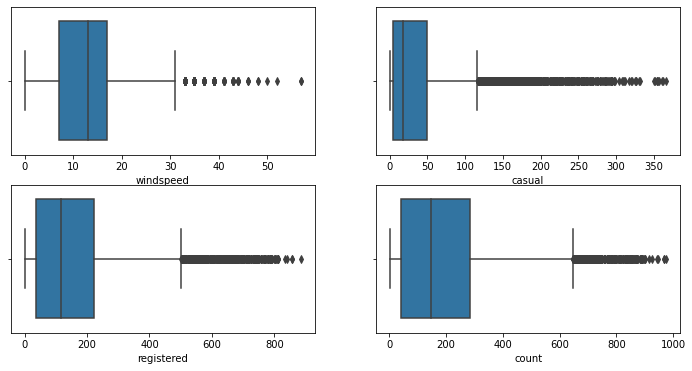

In [ ]:
# 查看异常值
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
# 绘制箱线图
sns.boxplot(x='windspeed', data=df,ax=axes[0][0])
sns.boxplot(x='casual', data=df, ax=axes[0][1])
sns.boxplot(x='registered', data=df, ax=axes[1][0])
sns.boxplot(x='count', data=df, ax=axes[1][1])
plt.show()

In [ ]:
# 数据加工
# 转换格式, 并提取出小时, 星期几, 月份
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df.datetime.dt.hour
df['week'] = df.datetime.dt.dayofweek
df['month'] = df.datetime.dt.month
df['year_month'] = df.datetime.dt.strftime('%Y-%m')
df['date'] = df.datetime.dt.date
# 删除datetime
df.drop('datetime', axis = 1, inplace = True)
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,week,month,year_month,date
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,5,1,2011-01,2011-01-01
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,5,1,2011-01,2011-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22,2,12,2012-12,2012-12-19
10885,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23,2,12,2012-12,2012-12-19


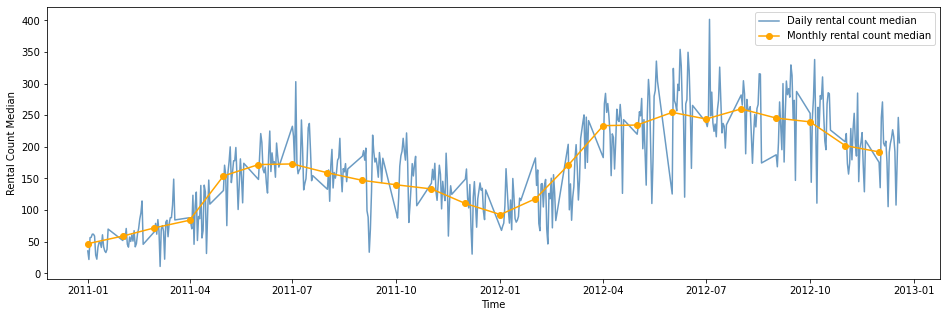

In [ ]:
# 日期和总租赁数量
import matplotlib.pyplot as plt
# 分别计算日期和月份中位数
group_date = df.groupby('date')['count'].median()
group_month = df.groupby('year_month')['count'].median()
group_month.index = pd.to_datetime(group_month.index)
plt.figure(figsize=(16,5))
plt.plot(group_date.index, group_date.values, '-', color = 'steelblue', label = 'Daily rental count median', alpha=0.8)
plt.plot(group_month.index, group_month.values, '-o', color='orange', label = 'Monthly rental count median')
plt.xlabel('Time')
plt.ylabel('Rental Count Median')
plt.legend()
plt.show()

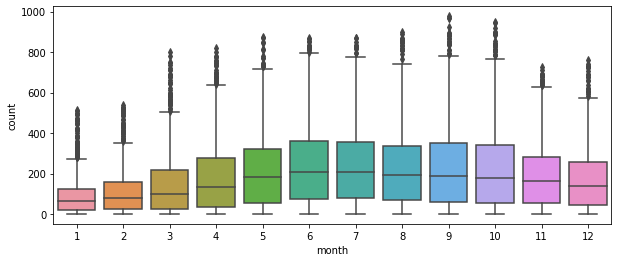

In [ ]:
# 月份和总租赁数量
import seaborn as sns
plt.figure(figsize=(10, 4))
sns.boxplot(x='month', y='count', data=df)
plt.show()

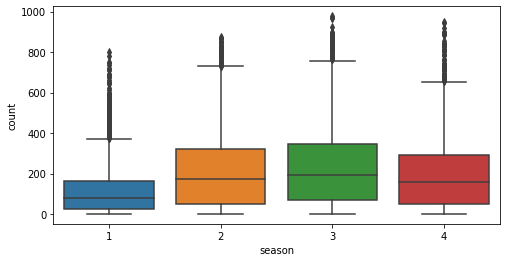

In [ ]:
# 季节和总租赁数量
plt.figure(figsize=(8, 4))
sns.boxplot(x='season', y='count', data=df)
plt.show()

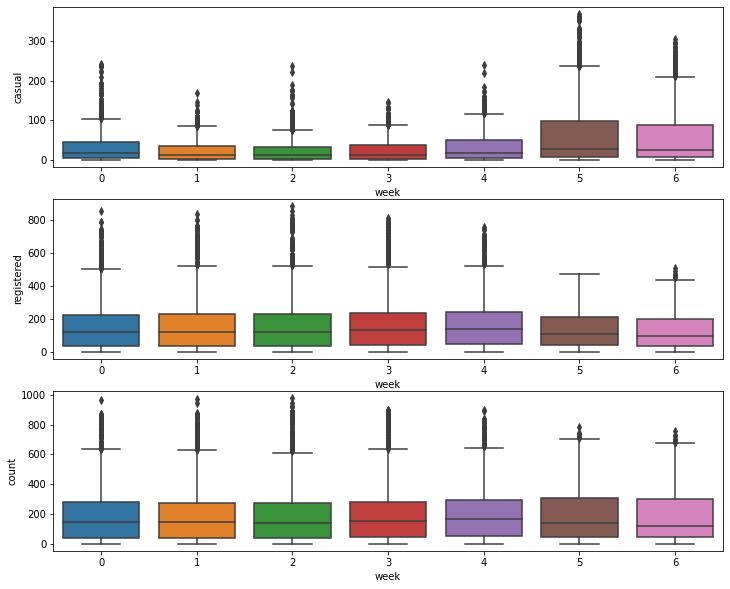

In [ ]:
# 星期和租赁数量
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))
sns.boxplot(x='week',y='casual' ,data=df,ax=axes[0])
sns.boxplot(x='week',y='registered', data=df, ax=axes[1])
sns.boxplot(x='week',y='count', data=df, ax=axes[2])
plt.show()

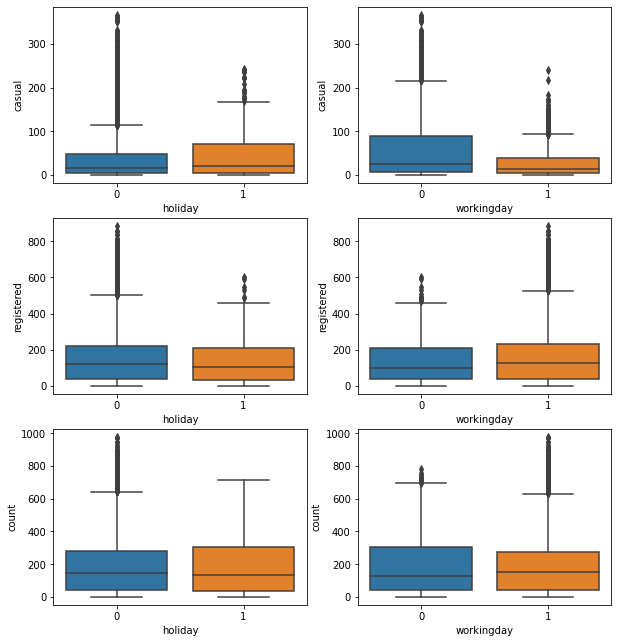

In [ ]:
# 节假日, 工作日和总租赁数量
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 11))
sns.boxplot(x='holiday', y='casual', data=df, ax=axes[0][0])
sns.boxplot(x='holiday', y='registered', data=df, ax=axes[1][0])
sns.boxplot(x='holiday', y='count', data=df, ax=axes[2][0])
sns.boxplot(x='workingday', y='casual', data=df, ax=axes[0][1])
sns.boxplot(x='workingday', y='registered', data=df, ax=axes[1][1])
sns.boxplot(x='workingday', y='count', data=df, ax=axes[2][1])
plt.show()

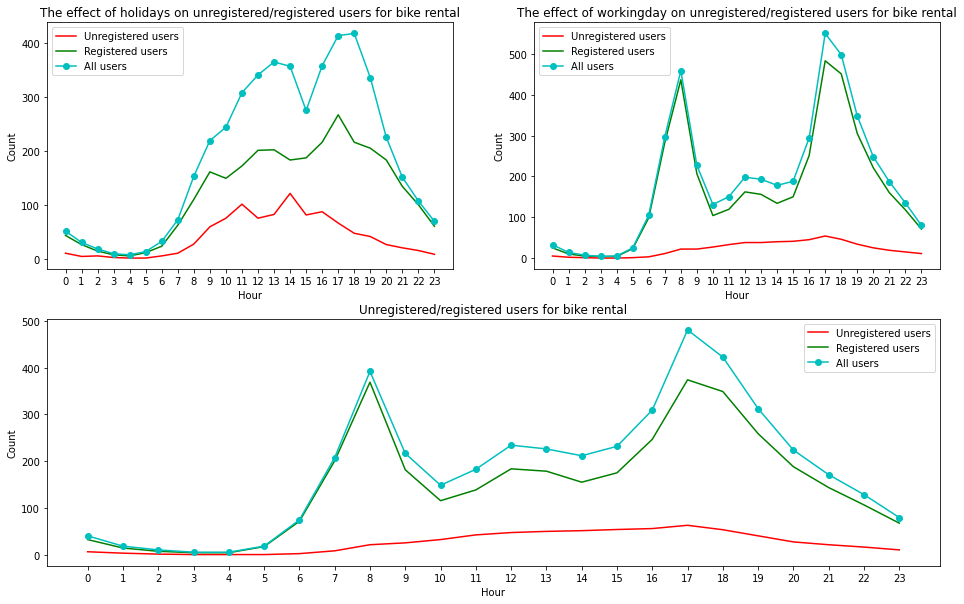

In [ ]:
# 小时和总租赁数量的关系
#绘制第一个子图
plt.figure(1, figsize=(16,10))
plt.subplot(221)
hour_casual=df[df.holiday==1].groupby('hour')['casual'].median()
hour_registered=df[df.holiday==1].groupby('hour')['registered'].median()
hour_count=df[df.holiday==1].groupby('hour')['count'].median()
plt.plot(hour_casual.index,hour_casual.values,'-',color='r',label='Unregistered users')
plt.plot(hour_registered.index,hour_registered.values,'-',color='g',label='Registered users')
plt.plot(hour_count.index,hour_count.values,'-o',color='c',label='All users')
plt.legend()
plt.xticks(hour_casual.index)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('The effect of holidays on unregistered/registered users for bike rental')

#绘制第二个子图
plt.subplot(222)
hour_casual=df[df.workingday==1].groupby('hour')['casual'].median()
hour_registered=df[df.workingday==1].groupby('hour')['registered'].median()
hour_count=df[df.workingday==1].groupby('hour')['count'].median()
plt.plot(hour_casual.index,hour_casual.values,'-',color='r',label='Unregistered users')
plt.plot(hour_registered.index, hour_registered.values, '-', color='g', label='Registered users')
plt.plot(hour_count.index, hour_count.values, '-o', color='c', label='All users')
plt.legend()
plt.xticks(hour_casual.index)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('The effect of workingday on unregistered/registered users for bike rental')

#绘制第三个子图
plt.subplot(212)
hour_casual=df.groupby('hour')['casual'].median()
hour_registered=df.groupby('hour')['registered'].median()
hour_count=df.groupby('hour')['count'].median()
plt.plot(hour_casual.index,hour_casual.values,'-',color='r',label='Unregistered users')
plt.plot(hour_registered.index,hour_registered.values,'-',color='g',label='Registered users')
plt.plot(hour_count.index,hour_count.values,'-o',color='c',label='All users')
plt.legend()
plt.xticks(hour_casual.index)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Unregistered/registered users for bike rental')

plt.show()

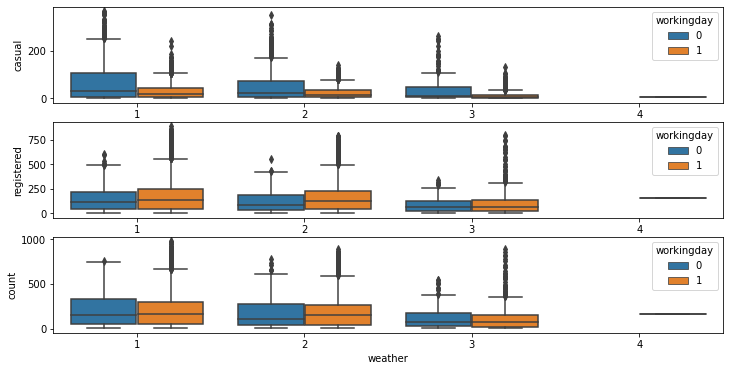

In [ ]:
# 天气和总租赁数量
fig, ax = plt.subplots(3, 1, figsize=(12, 6))
sns.boxplot(x='weather', y='casual', hue='workingday',data=df, ax=ax[0])
sns.boxplot(x='weather', y='registered',hue='workingday', data=df, ax=ax[1])
sns.boxplot(x='weather', y='count',hue='workingday', data=df, ax=ax[2])
plt.show()


In [ ]:
df[df.weather==4]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,week,month,year_month,date
5631,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,18,0,1,2012-01,2012-01-09


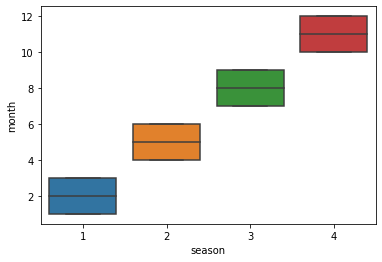

In [ ]:
sns.boxplot(x='season',y='month',data=df)
plt.show()

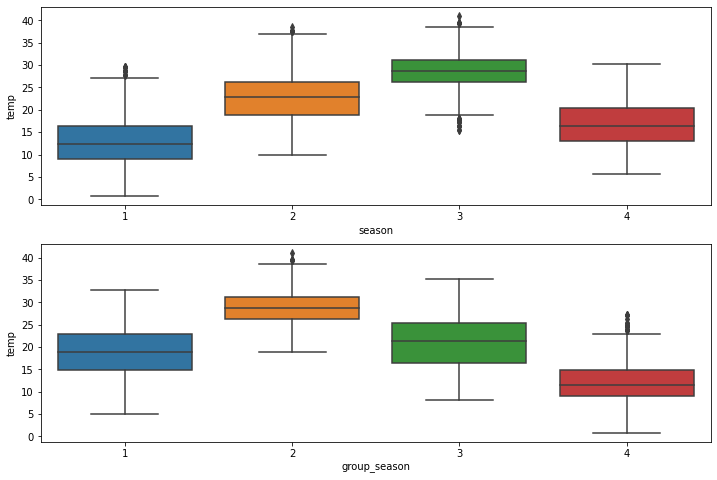

In [ ]:
import numpy as np
df['group_season']=np.where((df.month<=5)&(df.month>=3),1,
                            np.where((df.month<=8)&(df.month>=6),2,
                                     np.where((df.month<=11)&(df.month>=9),3,4)))
fig,ax=plt.subplots(2,1,figsize=(12,8))
# 绘制气温和季节箱线图
sns.boxplot(x='season',y='temp',data=df,ax=ax[0])
sns.boxplot(x='group_season',y='temp',data=df,ax=ax[1])
plt.show()

In [ ]:
df.drop('season', axis=1, inplace=True)
df.shape

(10886, 16)

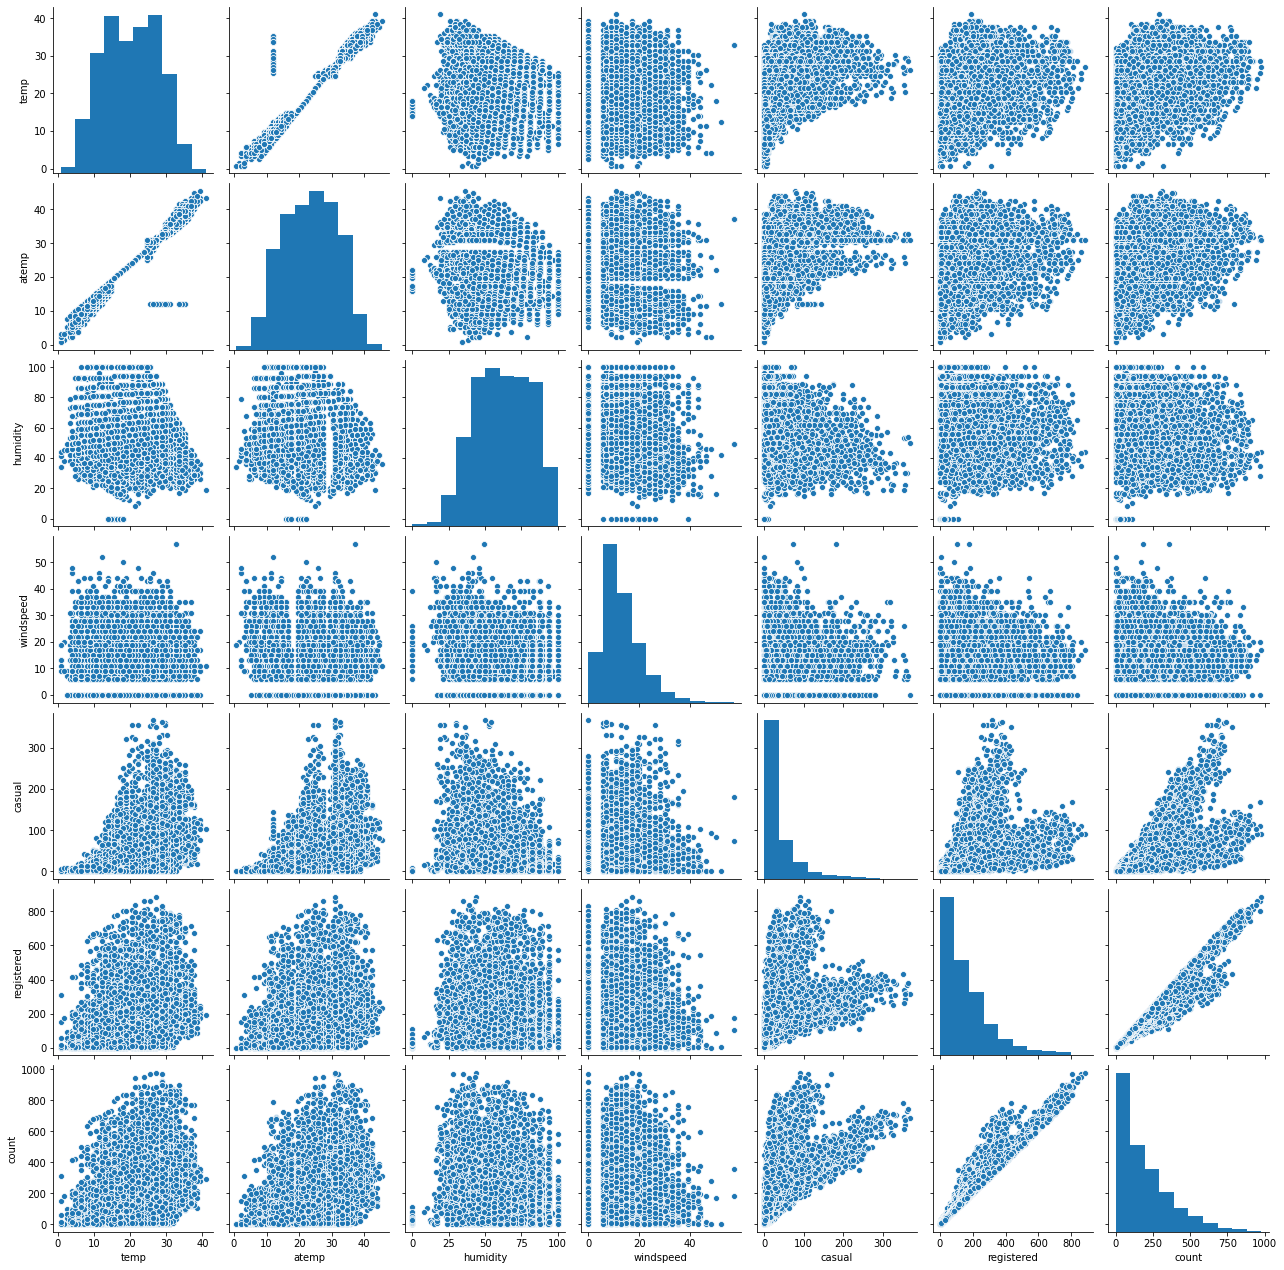

In [ ]:
# 其他变量和总租赁数量的关系
sns.pairplot(df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])
plt.show()

In [ ]:
df['windspeed']

0        0.0000
1        0.0000
          ...  
10884    6.0032
10885    8.9981
Name: windspeed, Length: 10886, dtype: float64

In [ ]:
df.loc[df.windspeed==0,'windspeed']=np.nan
df.fillna(method='bfill',inplace=True)
df.windspeed.isnull().sum()

0

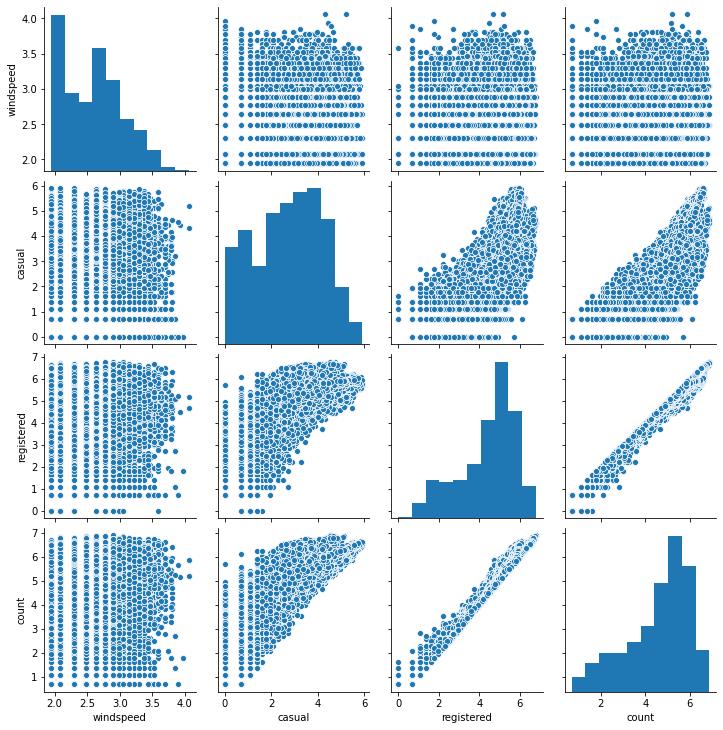

In [ ]:
# 相关矩阵
# 对数转换
df['windspeed']=np.log(df['windspeed'].apply(lambda x: x+1))
df['casual']=np.log(df['casual'].apply(lambda x:x+1))
df['registered']=np.log(df['registered'].apply(lambda x:x+1))
df['count']=np.log(df['count'].apply(lambda x:x+1))
sns.pairplot(df[['windspeed','casual','registered','count']])
plt.show()

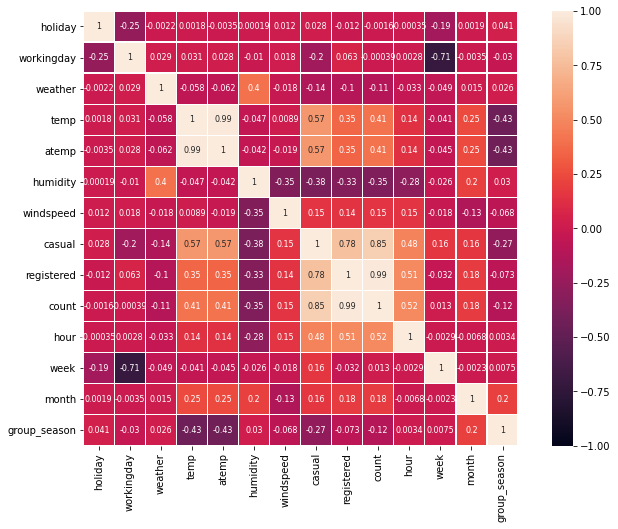

In [ ]:
correlation=df.corr(method='spearman')
plt.figure(figsize=(12,8))
# 绘制热力图
sns.heatmap(correlation,linewidths=0.2,vmax=1,vmin=-1,linecolor='w',annot=True,annot_kws={'size':8},square=True)
plt.show()

In [ ]:
# 划分数据集
from sklearn.model_selection import train_test_split
# 由于所有用户的租赁数量是由未注册用户和注册用户相加而成, 故删除.
df.drop(['casual','registered','year_month','date'], axis=1, inplace=True)
X = df.drop(['count'], axis=1)
y = df['count']
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 模型训练
from sklearn.linear_model import Ridge
# 这里的alpha指的是正则化项参数, 初始先设置为1.
rd = Ridge(alpha=1)
rd.fit(X_train, y_train)
print(rd.coef_)
print(rd.intercept_)

[ 0.00770067 -0.00034301  0.0039196   0.00818243  0.03635549 -0.01558927
  0.09080788  0.0971406   0.02791812  0.06114358 -0.00099811]
2.684027134374068


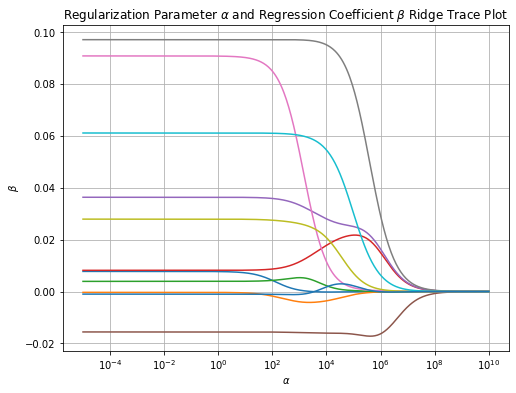

In [ ]:
# 设置参数以及训练模型
alphas=10**np.linspace(-5,10,500)
betas=[]
for alpha in alphas: 
  rd = Ridge(alpha = alpha)
  rd.fit(X_train, y_train)
  betas.append(rd.coef_)
# 绘制岭迹图
plt.figure(figsize=(8,6))
plt.plot(alphas,betas)
# 对数据进行对数转换，便于观察。
plt.xscale('log')
# 添加网格线
plt.grid(True)
# 坐标轴适应数据量
plt.axis('tight')
plt.title(r'Regularization Parameter $\alpha$ and Regression Coefficient $\beta$ Ridge Trace Plot')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.show()

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn import metrics
rd_cv = RidgeCV(alphas=alphas, cv=10, scoring='r2')
rd_cv.fit(X_train,y_train)
rd_cv.alpha_

805.0291812295973

In [ ]:
rd=Ridge(alpha=805.0291812295973)
fit_intercept=False
rd.fit(X_train,y_train)
print(rd.coef_)
print(rd.intercept_)

[ 0.00074612 -0.00382265  0.00532093  0.01100823  0.03375475 -0.01582157
  0.0584206   0.09708992  0.02639369  0.0604242  -0.00116086]
2.7977274604845803


In [ ]:
# 模型预测
from sklearn import metrics
from math import sqrt
# 分别预测训练数据和测试数据
y_train_pred = rd.predict(X_train)
y_test_pred = rd.predict(X_test)
# 分别计算其均方根误差和拟合优度
y_train_rmse = sqrt(metrics.mean_squared_error(y_train,y_train_pred))
y_train_score = rd.score(X_train,y_train)
y_test_rmse = sqrt(metrics.mean_squared_error(y_test,y_test_pred))
y_test_score = rd.score(X_test,y_test)
print('Train Set RMSE:{0},Score:{1}'.format(y_train_rmse,y_train_score))
print('Test Set RMSE:{0},Score:{1}'.format(y_test_rmse,y_test_score))

Train Set RMSE:1.0348076524200298,Score:0.46691272323469246
Test Set RMSE:1.0508046977499312,Score:0.45801571689420717


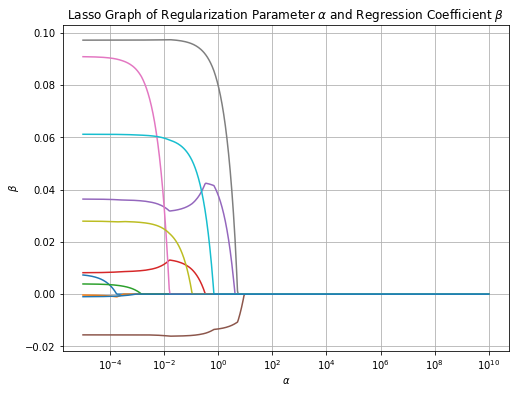

In [ ]:
# 模型训练
from sklearn.linear_model import Lasso
alphas = 10**np.linspace(-5,10,500)
betas = []
for alpha in alphas:
  Las = Lasso(alpha = alpha)
  Las.fit(X_train,y_train)
  betas.append(Las.coef_)
plt.figure(figsize=(8,6))
plt.plot(alphas,betas)
plt.xscale('log')
plt.grid(True)
plt.axis('tight')
plt.title(r'Lasso Graph of Regularization Parameter $\alpha$ and Regression Coefficient $\beta$')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.show()

In [ ]:
# 采用交叉验证选择Lasso回归最优正则化项参数
from sklearn.linear_model import LassoCV
from sklearn import metrics
Las_cv = LassoCV(alphas=alphas,cv=10)
Las_cv.fit(X_train,y_train)
Las_cv.alpha_

0.005074705239490466

In [ ]:
Las = Lasso(alpha=0.005074705239490466)
fit_intercept=False
Las.fit(X_train,y_train)
print(Las.coef_)
print(Las.intercept_)

[ 0.         -0.          0.          0.01001827  0.03467474 -0.01570339
  0.06202352  0.09721864  0.02632133  0.06032038 -0.        ]
2.780830398244292


In [ ]:
# 用Lasso分别预测训练集和测试集, 并计算均方根误差和拟合优度
y_train_pred = Las.predict(X_train)
y_test_pred = Las.predict(X_test)
y_train_rmse = sqrt(metrics.mean_squared_error(y_train,y_train_pred))
y_train_score = Las.score(X_train,y_train)
y_test_rmse = sqrt(metrics.mean_squared_error(y_test,y_test_pred))
y_test_score = Las.score(X_test,y_test)
print('Train Set RMSE:{0}, Score:{1}'.format(y_train_rmse,y_train_score))
print('Test Set RMSE:{0}, Score:{1}'.format(y_test_rmse,y_test_score))

Train Set RMSE:1.0347988070045209, Score:0.4669218367318746
Test Set RMSE:1.050818996520012, Score:0.45800096674816204


In [ ]:
from sklearn.linear_model import LinearRegression
# 训练线性回归模型
LR = LinearRegression()
LR.fit(X_train,y_train)
print(LR.coef_)
print(LR.intercept_)
# 分别预测训练集和测试集，并计算均方根误差和拟合优度
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
y_train_rmse = sqrt(metrics.mean_squared_error(y_train,y_train_pred))
y_train_score = LR.score(X_train,y_train)
y_test_rmse = sqrt(metrics.mean_squared_error(y_test,y_test_pred))
y_test_score = LR.score(X_test,y_test)
print('Train Set RMSE:{0}, Score:{1}'.format(y_train_rmse,y_train_score))
print('Test Set RMSE:{0}, Score:{1}'.format(y_test_rmse,y_test_score))

[ 0.00775915 -0.00032048  0.00391537  0.00817703  0.03636054 -0.01558878
  0.09087069  0.09714058  0.02792397  0.06114454 -0.00099731]
2.6837869701964037
Train Set RMSE:1.0347173340121176, Score:0.46700577529675036
Test Set RMSE:1.0510323073614725, Score:0.45778089839236125
